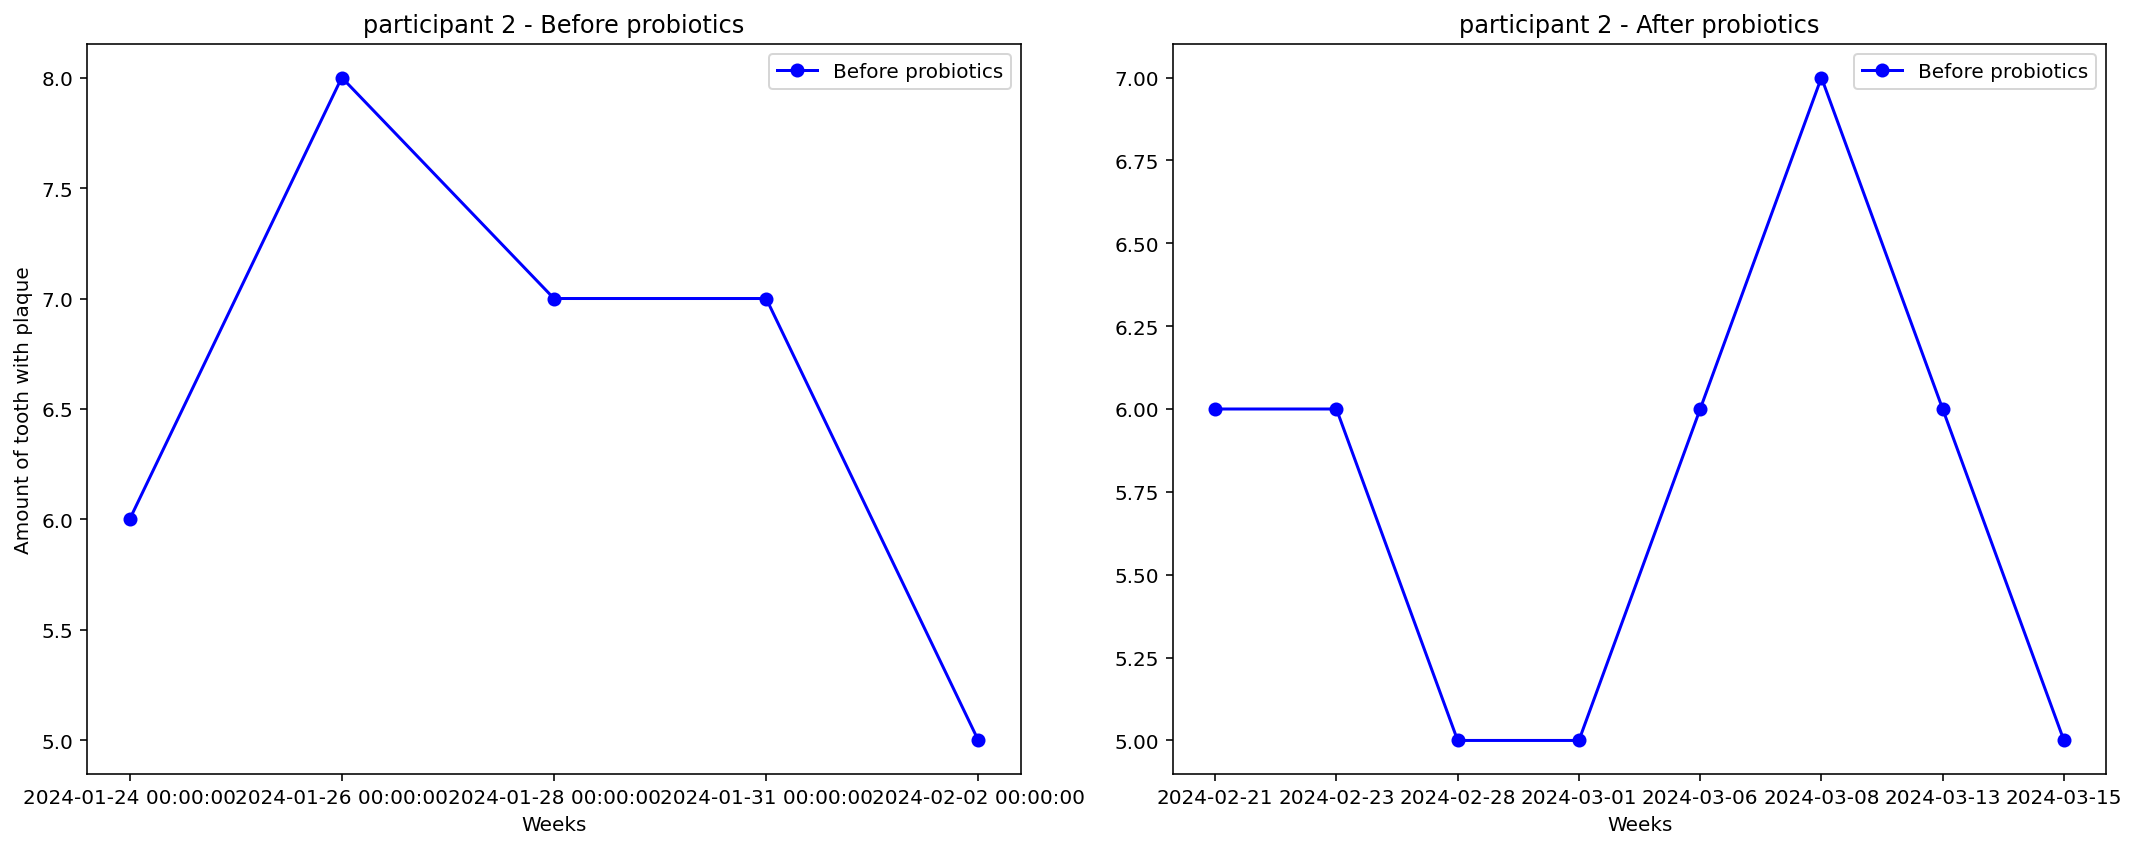

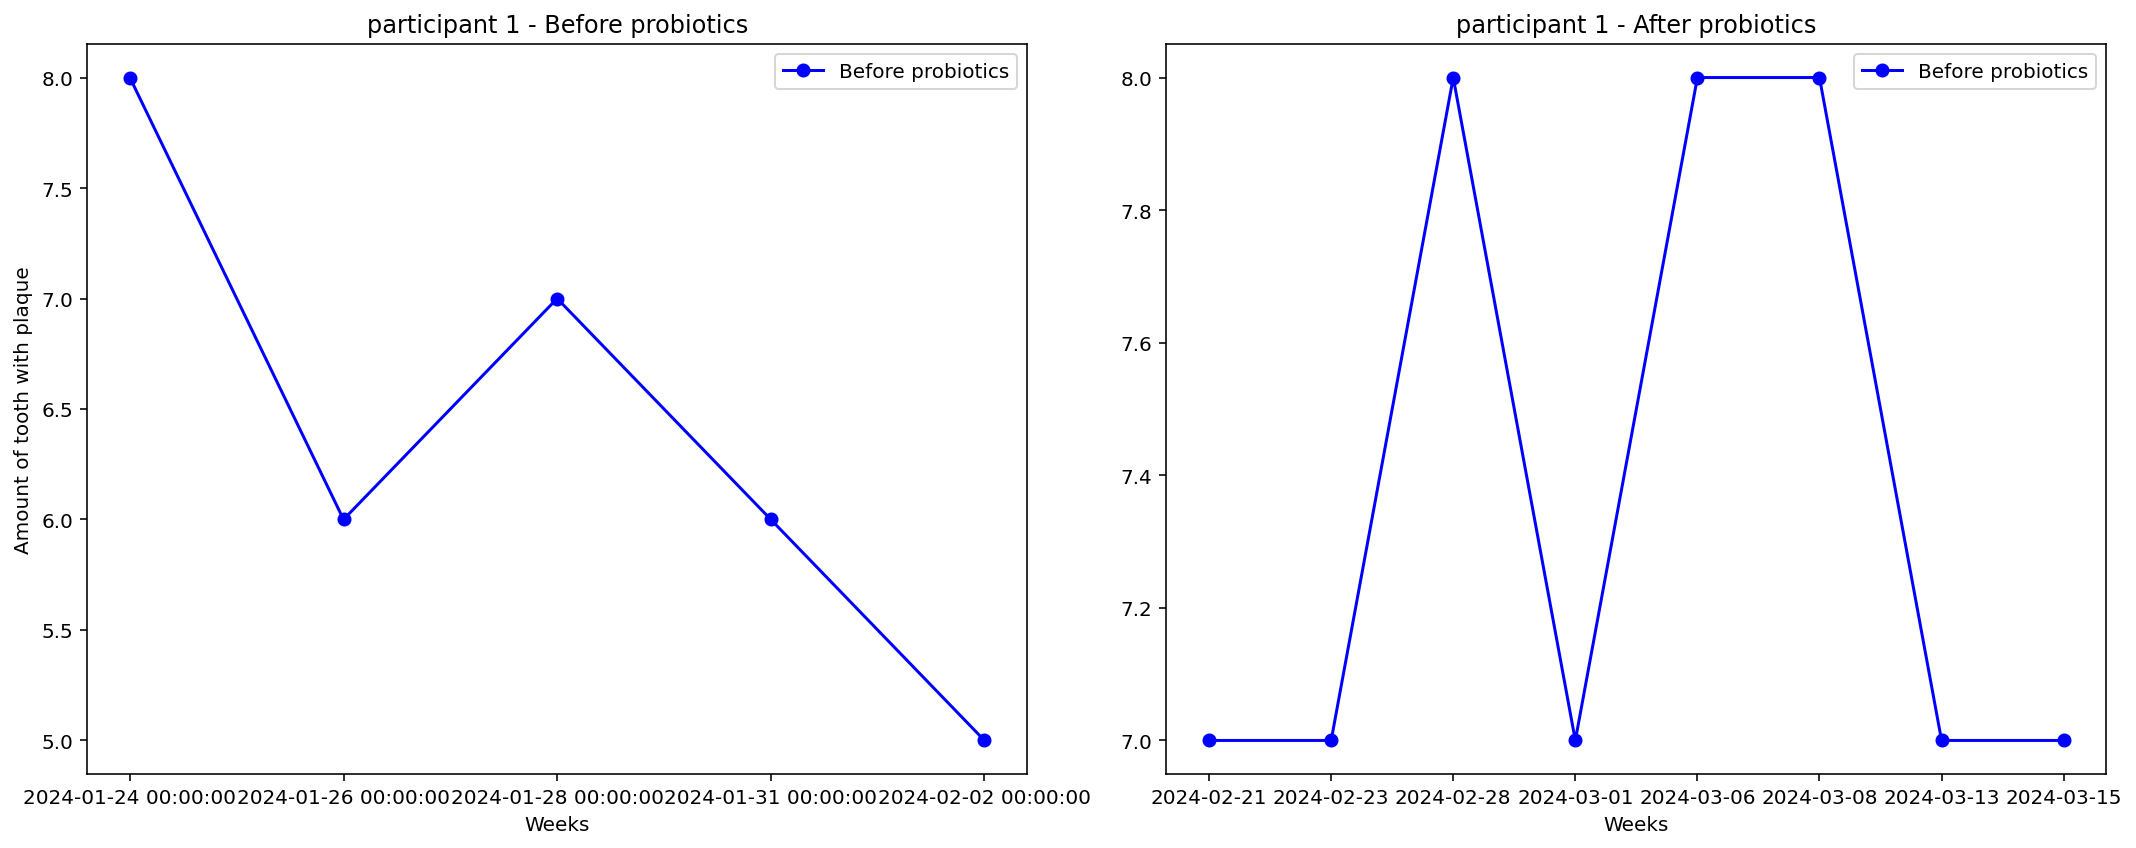

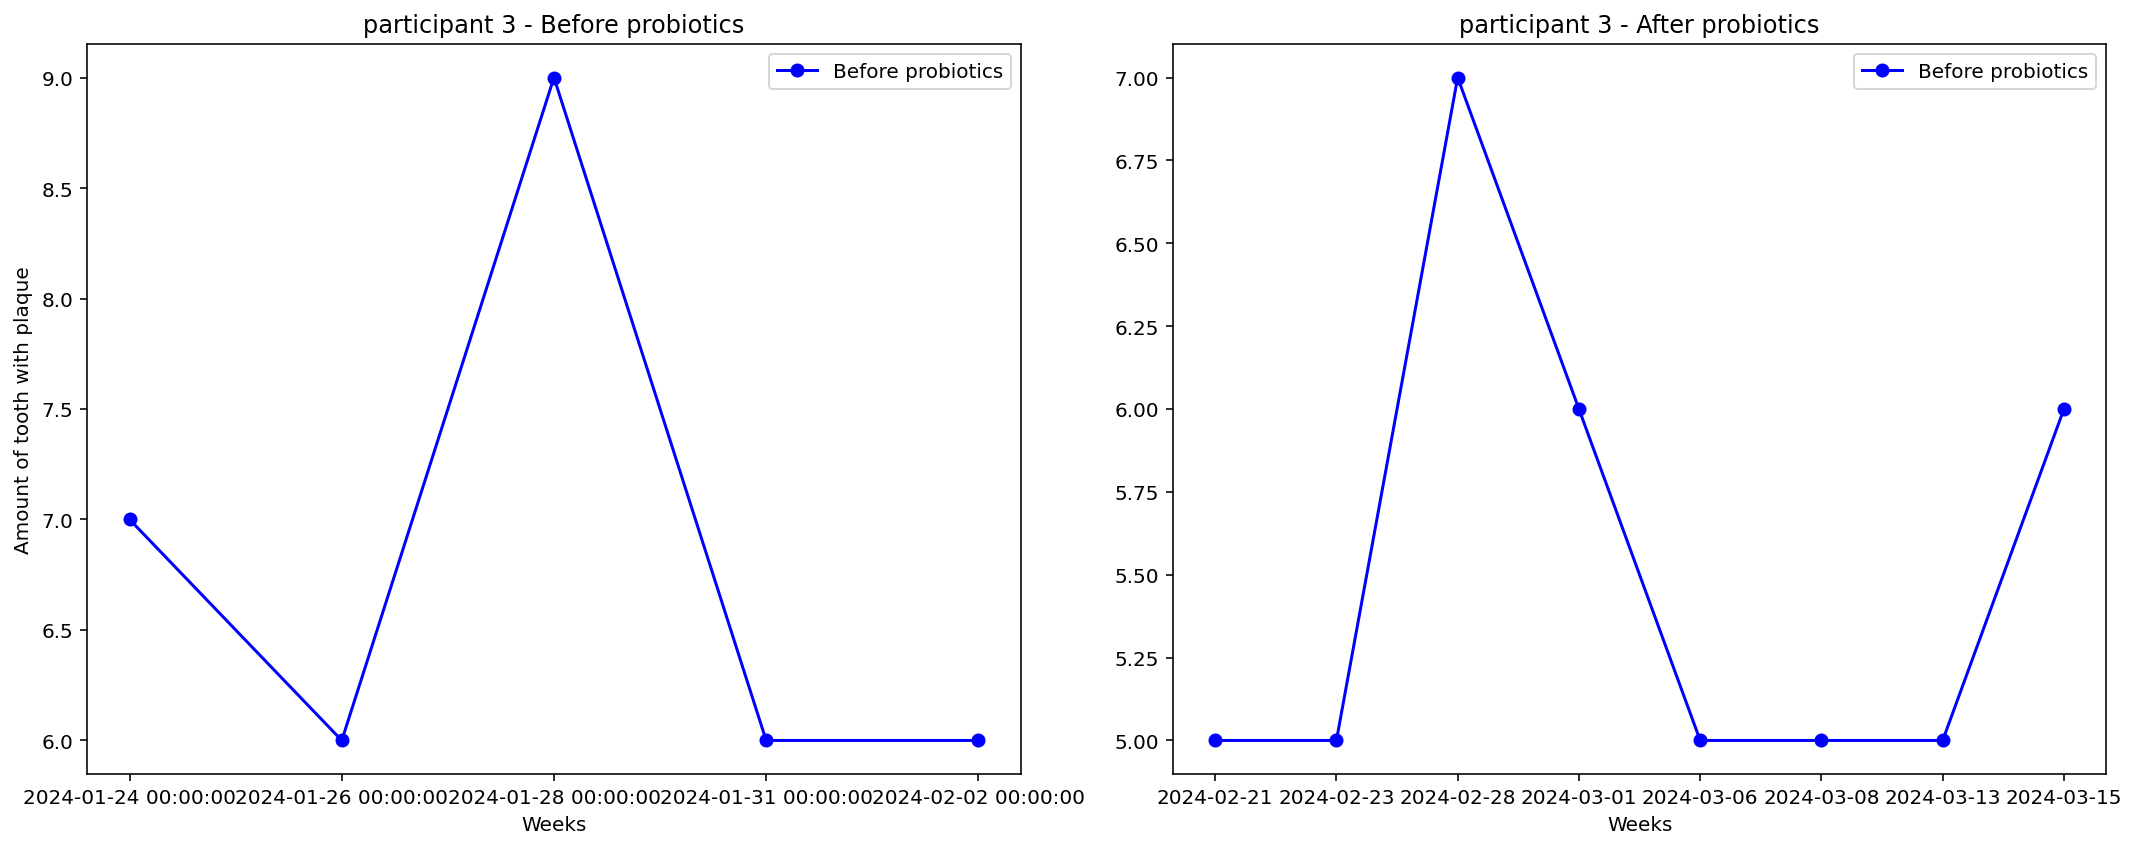

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets
import panel as pn
pn.extension()

def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()

df_before_plaque = pd.read_csv(config['plaque'])
df_after_plaque = pd.read_csv(config['plaque2'])

# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

In [53]:
# Cleanup and preparation
df_before_plaque_cleaned = df_before_plaque.dropna()
df_after_plaque_cleaned = df_after_plaque.dropna()

df_before_plaque_sorted = df_before_plaque_cleaned.sort_values(by='Weeks')
df_after_plaque_sorted = df_after_plaque_cleaned.sort_values(by='Weeks')

weeks_before = df_before_plaque_sorted['Weeks']
weeks_after = df_after_plaque_sorted['Weeks']

participants = df_before_plaque_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    if participant in df_before_plaque_sorted.columns:
        axes[0].plot(weeks_before, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')
        axes[0].set_title(f'{participant} - Before probiotics')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('Amount of tooth with plaque')
        axes[0].legend()
        
    if participant in df_after_plaque_sorted.columns:
        axes[1].plot(weeks_after, df_after_plaque_sorted[participant], marker='o', label='After probiotics', color='green')
        axes[1].set_title(f'{participant} - After probiotics')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create a Dropdown widget for participants
participant_selector = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Widget interaction
widgets.interactive(plot_data, participant=participant_selector)

interactive(children=(Dropdown(description='Participant:', options=('participant 1', 'participant 2', 'partici…

In [70]:
%matplotlib inline

# Sample data generation
df_before_plaque_cleaned = df_before_plaque.dropna()
df_after_plaque_cleaned = df_after_plaque.dropna()

df_before_plaque_sorted = df_before_plaque_cleaned.sort_values(by='Weeks')
df_after_plaque_sorted = df_after_plaque_cleaned.sort_values(by='Weeks')

weeks_before = pd.to_datetime(df_before_plaque_sorted['Weeks']).dt.strftime('%d-%m')
weeks_after = pd.to_datetime(df_after_plaque_sorted['Weeks']).dt.strftime('%d-%m')

participants = df_before_plaque_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    
    if participant in df_before_plaque.columns:
        min_y_before = df_before_plaque_sorted[participant].min()
        axes[0].plot(weeks_before, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')
        axes[0].set_title(f'{participant} - Amount of tooth plaque before probiotics')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('Amount of tooth with plaque')
        axes[0].legend()
        axes[0].tick_params(axis='y', labelsize=10)
        axes[0].set_yticks(np.arange(min_y_before, df_before_plaque_sorted[participant].max()+1,0.5))
        axes[0].set_ylim(min_y_before, df_before_plaque_sorted[participant].max()+1,0.5)
        
    if participant in df_after_plaque.columns:
        min_y_after = df_after_plaque_sorted[participant].min()
        axes[1].plot(weeks_after, df_after_plaque_sorted[participant], marker='o', label='after probiotics', color='green')
        axes[1].set_title(f'{participant} - Amount of tooth plaque after probiotics')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
        axes[1].tick_params(axis='y', labelsize=10)
        axes[1].set_yticks(np.arange(min_y_after, df_after_plaque_sorted[participant].max()+1,0.5))
        axes[1].set_ylim(min_y_after, df_after_plaque_sorted[participant].max()+1,0.5)
    
    plt.tight_layout()
    return fig

# Create Dropdown widget for participants
participant_selector = pn.widgets.Select(
    options=participants,
    value=participants[0],
    name='Participant'
)

# Function to update plot based on selected participant
def update_plot(event):
    participant = event.new
    fig = plot_data(participant)
    plot_pane.object = fig

# Register function update_plot as an event handler for changes in the Dropdown widget
participant_selector.param.watch(update_plot, 'value')

plot_pane = pn.pane.Matplotlib()

# Define the layout
dashboard_layout = pn.Column(
    participant_selector,
    plot_pane
)


# Create the dashboard
dashboard = pn.template.BootstrapTemplate(title='Dashboard MicroMouth Marvels', header_background='lightblue')
dashboard.main.append(dashboard_layout)
dashboard.show()

Launching server at http://localhost:43179
